<a href="https://colab.research.google.com/github/pikey-msc/Python/blob/main/M3/C7_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install PyCurve

PyCurve es un paquete de Python que proporciona al usuario una herramienta útil de curva de rendimiento de alto nivel. Por ejemplo, puede crear una instancia de una Curva y obtener un d_rate, un factor de descuento, incluso un d_rate directo dada una metodología múltiple desde la interpolación lineal hasta métodos de parametrización como Nelson Siegel o Bjork-Christensen. PyCurve también puede proporcionar soluciones para construir una curva de rendimiento o cotizar derivados de tasas de interés a través de Vasicek o Hull and White.

A continuación, se encuentran las características que aborda este paquete:

* Suavizado de curvas:
  * Crear objeto de curva con dos matrices numpy (t, rt)
  * Interpolación lineal dada una curva
  * Interpolación cúbica dada una Curva
  * Nelson Siegel y Svensson creación de modelos y trazado de componentes
  * Calibración de Nelson Siegel y Svensson dada una curva
  * Bjork Christensen y Augmented (6 factores) creación de modelos y trazado de componentes
* Modelado estocástico:
  * Simulación del modelo Vasicek
  * Simulación de modelo de un factor de casco y blanco

# Objeto de Curva

Este objeto consiste en una simple encapsulación de la curva de rendimiento. Este objeto es utilizado por otras clases para encapsular resultados o para crear directamente una curva con los datos observados en el mercado.

    Attributes	Type	    Description
    rt	     Private	    Interest rates as float in a numpy.ndarray
    t	       Private	    Time as float or int in a numpy.ndarray

In [4]:
from PyCurve.curve import Curve
import numpy as np

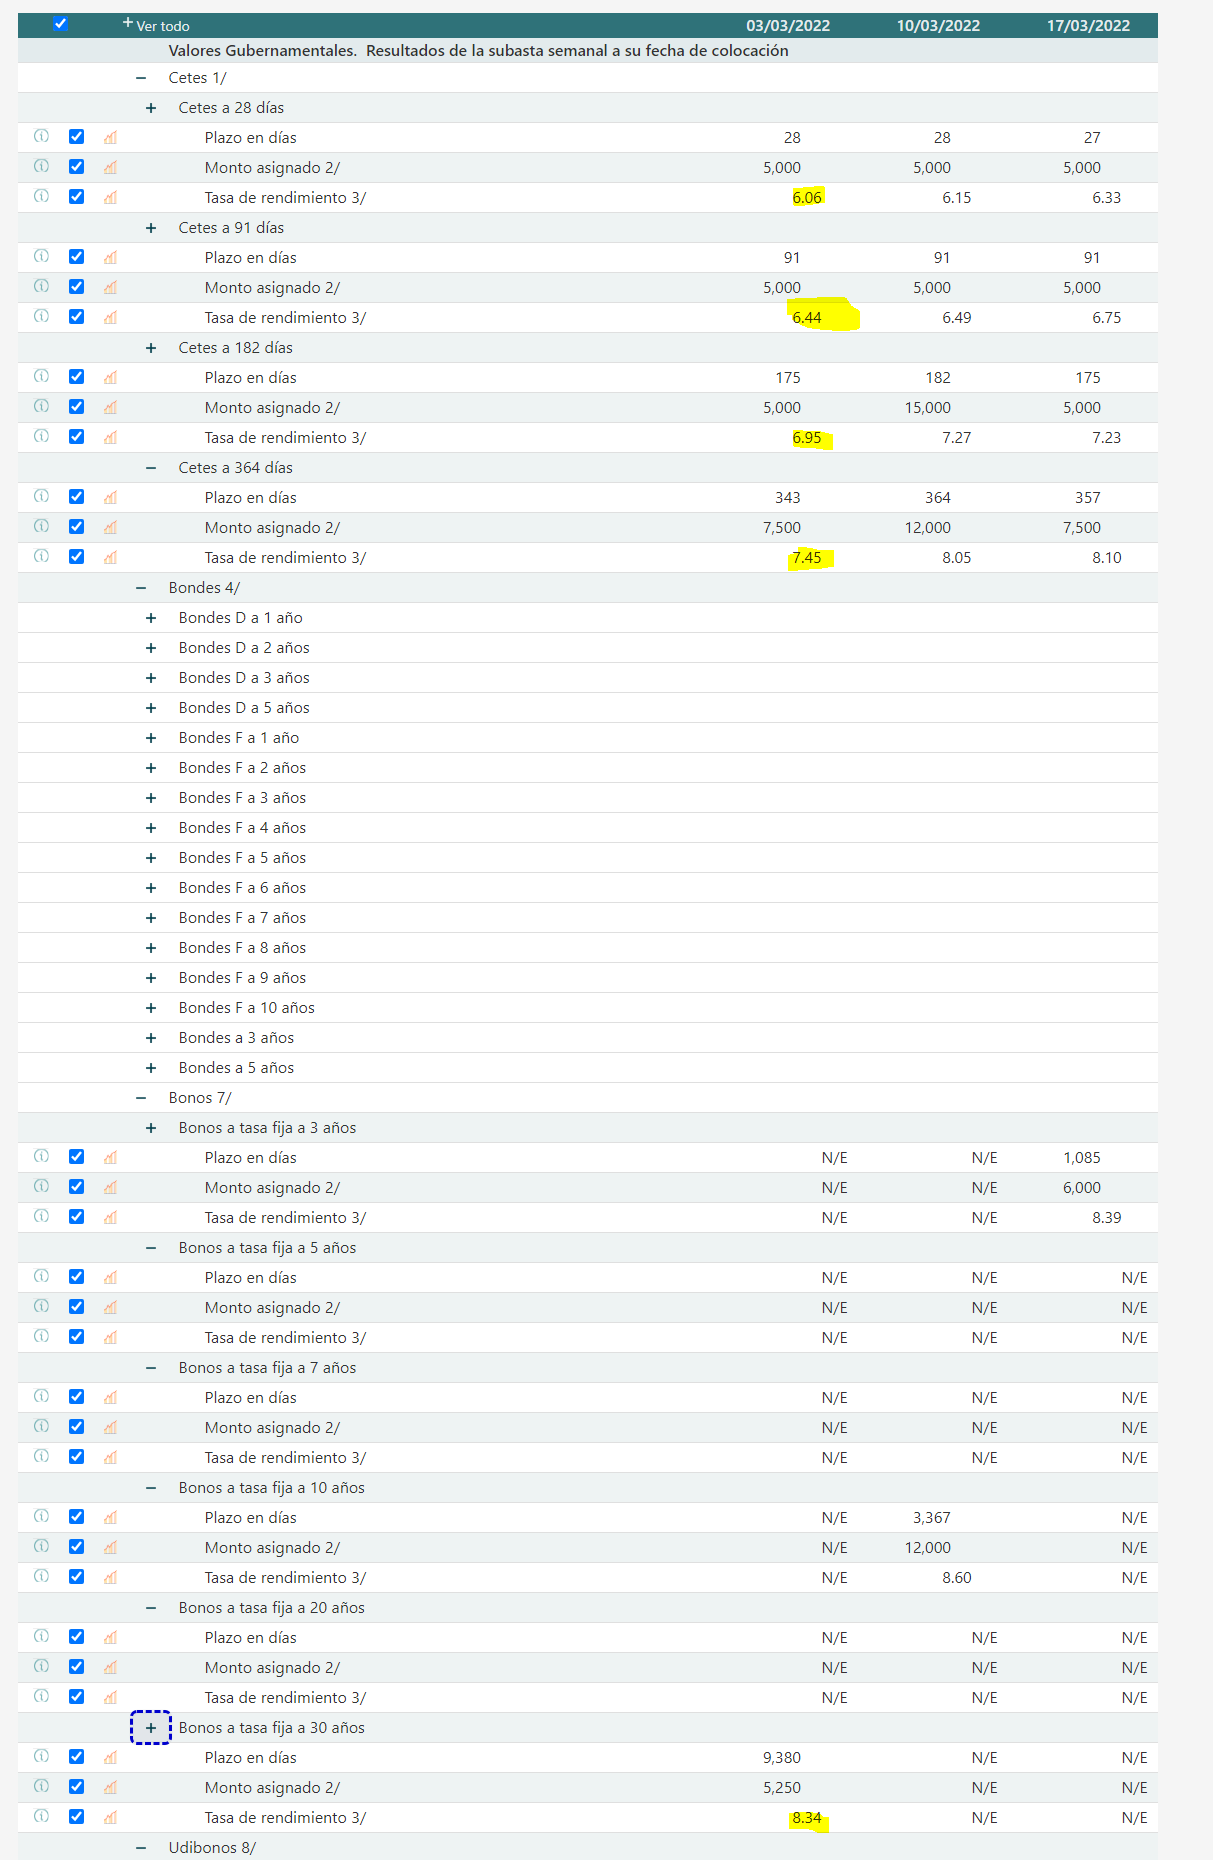

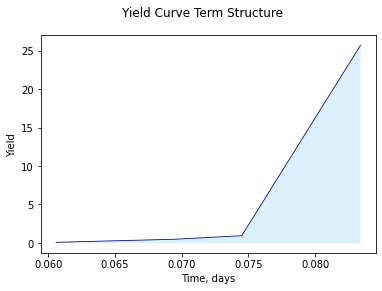

[ 0.07671233  0.24931507  0.47945205  0.93972603 25.69863014]
[0.0606 0.0644 0.0695 0.0745 0.0834]


In [127]:
time = np.array([28/365, 91/365, 175/365, 343/365, 9380/365])
rate = np.array([0.0606,0.0644,0.0695,0.0745, 0.0834 ])
curve = Curve(rate,time)
curve.plot_curve()
print(curve.get_rate)
print(curve.get_time)


# Construcción Yield Curve

Esta sección es la descripción con ejemplos de lo que puede hacer con este paquete. Tenga en cuenta que para todos los ejemplos en esta sección, la curva se refiere a la curva a continuación. Puede ver un ejemplo con respecto al objeto de curva en la sección dedicada.

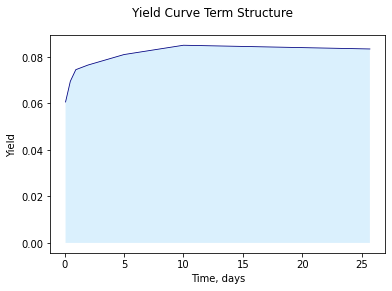

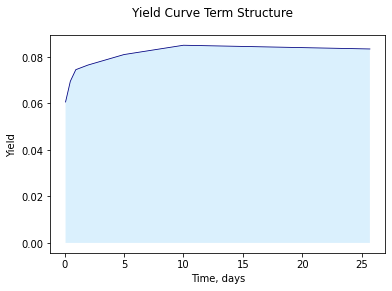

In [65]:
time = np.array([28/365, 91/365, 175/365, 343/365, 720/365, 5, 10, 9380/365])
d_rate = np.array([0.0606,0.0644,0.0695,0.0745, 0.0765, 0.081, 0.085,  0.0834 ])
curve = Curve(time,d_rate)
curve.plot_curve()


# Lineal

Interpola cualquier d_rate de una curva de rendimiento mediante interpolación lineal. Este módulo está construido usando scipy.interpolate

    Attributes     	 Type	            Description
      curve	        Private	   Curve Object to be intepolated
    func_rate	      Private	   interp1d Object used to interpolate

In [66]:
from PyCurve.linear import LinearCurve
linear_curve = LinearCurve(curve)
print("7.5-year d_rate : "+str(linear_curve.d_rate(7.5)))
print("7.5-year discount d_rate : "+str(linear_curve.df_t(7.5)))
print("Forward d_rate between 7.5 and 12.5 years : "+str(linear_curve.forward(7.5,12.5)))

7.5-year d_rate : 0.083
7.5-year discount d_rate : 0.9937969010982552
Forward d_rate between 7.5 and 12.5 years : 0.08736300174520069


# Cúbica

Interpola cualquier d_rate de una curva de rendimiento mediante interpolación cúbica. Este módulo está construido usando scipy.interpolate

    Attributes     	 Type	            Description
      curve	        Private	   Curve Object to be intepolated
    func_rate	      Private	   PPoly Object used to interpolate



In [67]:
from PyCurve.cubic import CubicCurve
cubic_curve = CubicCurve(curve)
print("10-year d_rate : "+str(cubic_curve.d_rate(10)))
print("10-year discount d_rate : "+str(cubic_curve.df_t(7.5)))
print("Forward d_rate between 10 and 20 years : "+str(cubic_curve.forward(7.5,12.5)))

10-year d_rate : 0.085
10-year discount d_rate : 0.9937213001630472
Forward d_rate between 10 and 20 years : 0.08539400982798258


# Nelson-Siegel & Nelson-Siegel Svensson

    Attributes	  Type        	Description
      beta0	    Private	Model Coefficient Beta0 (los niveles a largo plazo de la tasa de interés, el valor es 1 y no decae)
      beta1	    Private	Model Coefficient Beta1 (el componente a corto plazo, comienza en 1 y decae rápido a cero)
      beta2	    Private	Model Coefficient Beta2 (el término de plazo medio, empieza en cero, crece y cae a cero)
      tau	      Private	Model Coefficient tau (factor de decaimiento, valores pequeños decaen lentamente y ajusta mejores curvas con plazos largos,valores grandes producen decaimiento rápido y ajustan mejor para plazos cortos)
      attr_list	Private	Coefficient list

Creación de un modelo y calibración


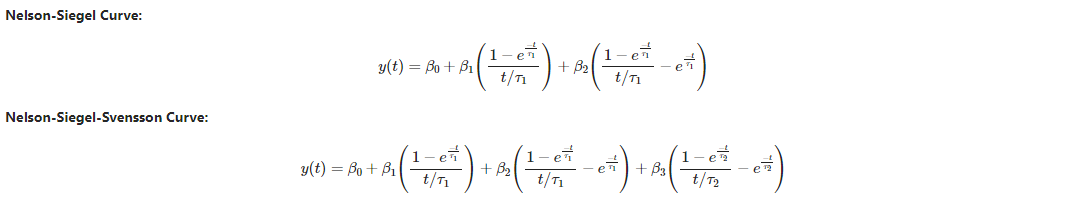

In [68]:
from PyCurve.nelson_siegel import NelsonSiegel
ns = NelsonSiegel(0.3,0.4,12,1)
ns.calibrate(curve)

Nelson Siegel Model
beta0 = 0.08384737331990895
beta1 = -0.023088231493797493
beta2 = 0.018641889487305423
tau = 1.169903879548916
____________________________
Calibration Results
b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Mean Squared Error 1.7744895894320384e-05
Number of Iterations 16
____________________________


      fun: 1.7744895894320384e-05
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.51426452e-05, 1.82889657e-05, 1.26883164e-06, 1.28710885e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 85
      nit: 16
   status: 0
  success: True
        x: array([ 0.08384737, -0.02308823,  0.01864189,  1.16990388])

Graficamos y analizamos

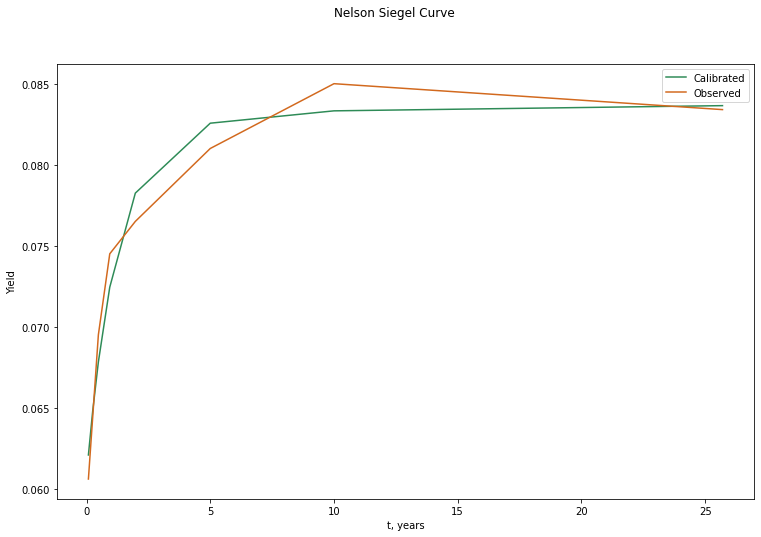

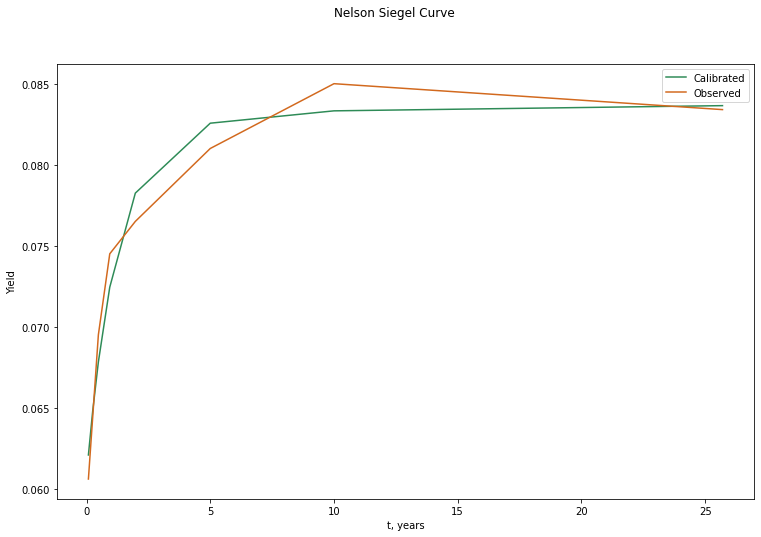

In [69]:
ns.plot_calibrated(curve)

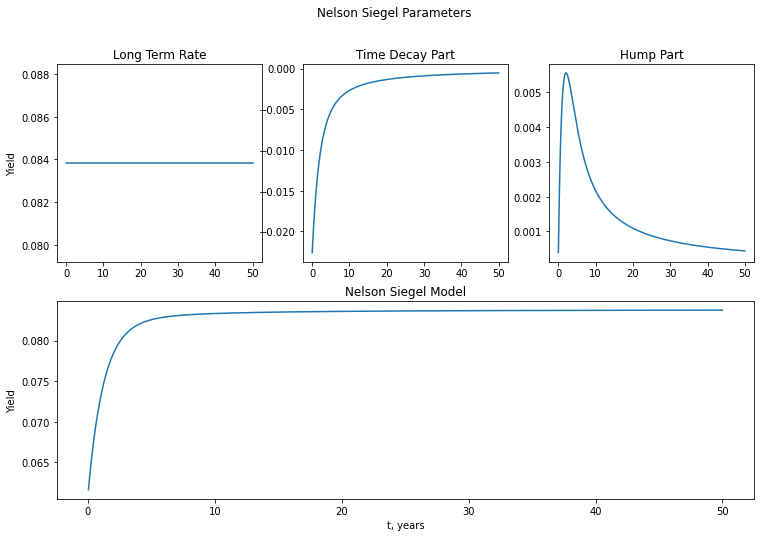

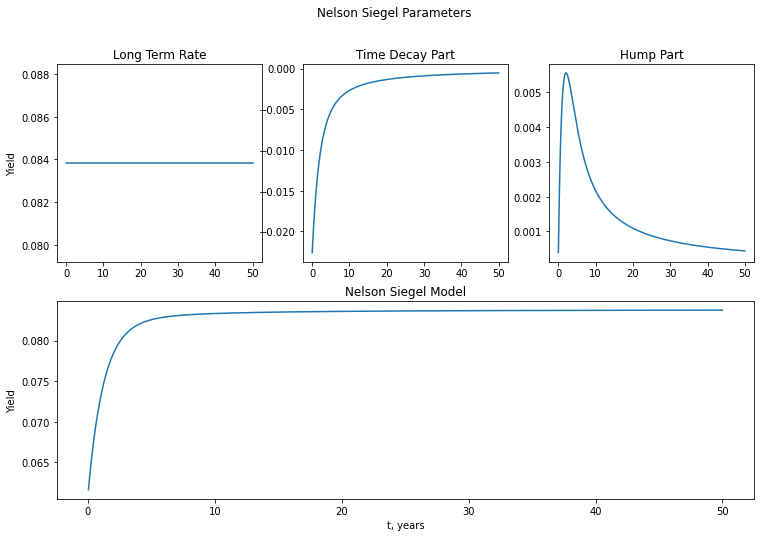

In [70]:
ns.plot_model_params()


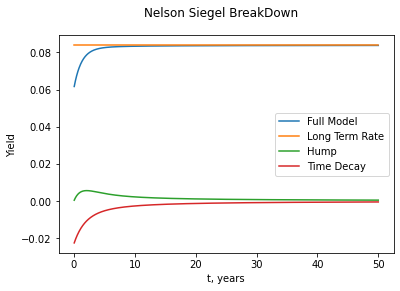

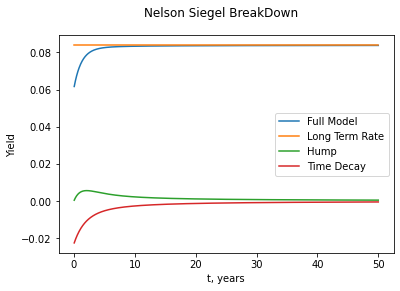

In [71]:
ns.plot_model()

# nelson-siegel-svensson

    Attributes	  Type        	Description
      beta0	    Private	Model Coefficient Beta0 (los niveles a largo plazo de la tasa de interés, el valor es 1 y no decae)
      beta1	    Private	Model Coefficient Beta1 (el componente a corto plazo, comienza en 1 y decae rápido a cero)
      beta2	    Private	Model Coefficient Beta2 (el término de plazo medio, empieza en cero, crece y cae a cero)
      beta3     Similar a beta2
      tau	      Private	Model Coefficient tau (factor de decaimiento, valores pequeños decaen lentamente y ajusta mejores curvas con plazos largos,valores grandes producen decaimiento rápido y ajustan mejor para plazos cortos)
      attr_list	Private	Coefficient list      beta3	    Private	Model 
      tau2	     Similar al factor de decaimiento
      attr_list	Private	Coefficient list

Creación de un modelo y calibración

In [72]:
from PyCurve.svensson_nelson_siegel import NelsonSiegelAugmented
nss = NelsonSiegelAugmented(0.3,0.4,12,12,1,1)
nss.calibrate(curve)

Augmented Nelson Siegel Model
beta0 = 0.0859717155786777
beta1 = -0.02695795361973974
beta2 = -0.1053981617209038
beta3 = 0.12274618239697274
tau = 1.157359629053243
tau2 = 1.0083985484466316
____________________________
Calibration Results
b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Mean Squared Error 1.027824878325327e-05
Number of Iterations 22
____________________________


      fun: 1.027824878325327e-05
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 9.26298968e-07,  5.75356447e-07, -1.44850511e-06,  2.82683863e-07,
        7.04066254e-06,  6.22389188e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 182
      nit: 22
   status: 0
  success: True
        x: array([ 0.08597172, -0.02695795, -0.10539816,  0.12274618,  1.15735963,
        1.00839855])

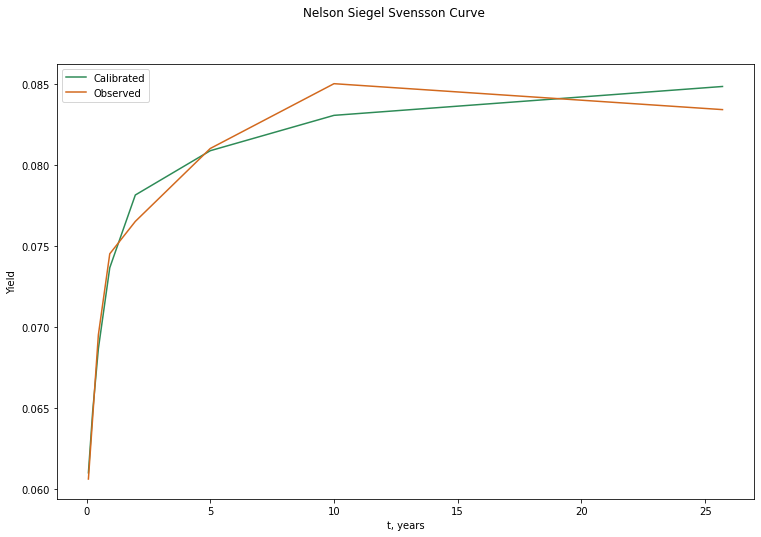

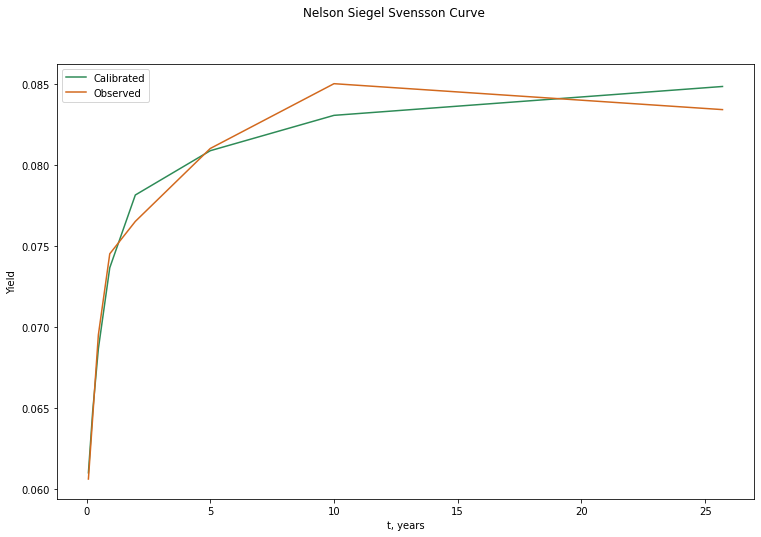

In [74]:
nss.plot_calibrated(curve)

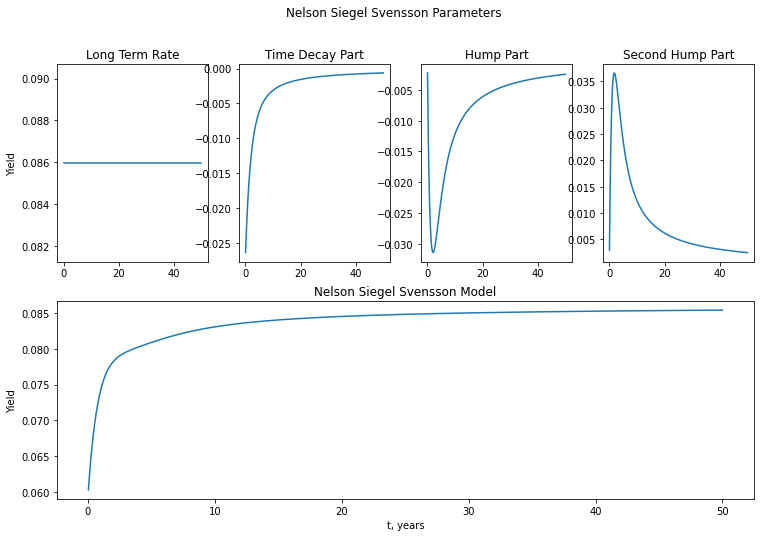

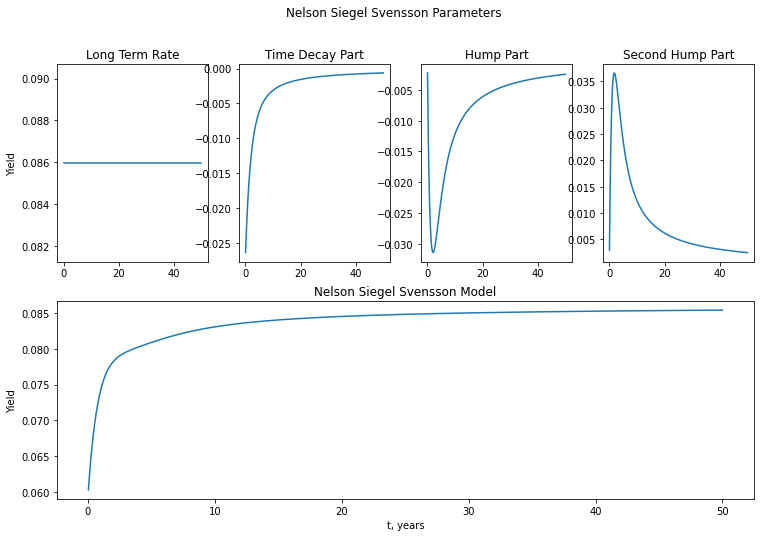

In [73]:
nss.plot_model_params()

# bjork-christensen

    Attributes	  Type        	Description
      beta0	    Private	Model Coefficient Beta0
      beta1	    Private	Model Coefficient Beta1
      beta2	    Private	Model Coefficient Beta2
      beta3	    Private	Model Coefficient Beta3
      tau	      Private	Model Coefficient tau
      attr_list	Private	Coefficient list

Creación de un modelo y calibración

In [75]:
from PyCurve.bjork_christensen import BjorkChristensen
bjc = BjorkChristensen(0.3,0.4,12,12,1)
bjc.calibrate(curve)

Bjork & Christensen Model
beta0 = 0.08447314386822771
beta1 = 0.0014996294540581875
beta2 = 0.0008558094926813935
beta3 = -0.0261071935026776
tau = 1.1354601400217537
____________________________
Calibration Results
b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Mean Squared Error 1.2308357790633355e-05
Number of Iterations 13
____________________________


      fun: 1.2308357790633355e-05
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.23347957e-05, -7.29707815e-05,  4.18982881e-05,  5.81390957e-05,
        1.06021103e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 84
      nit: 13
   status: 0
  success: True
        x: array([ 8.44731439e-02,  1.49962945e-03,  8.55809493e-04, -2.61071935e-02,
        1.13546014e+00])

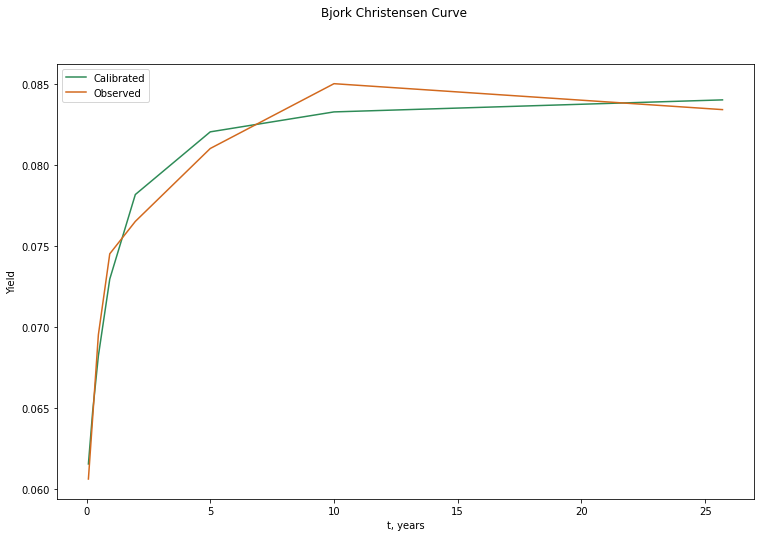

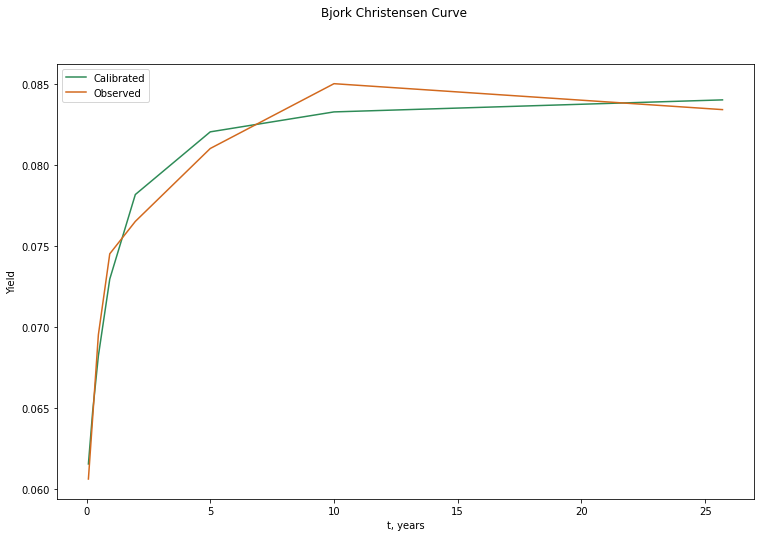

In [78]:
bjc.plot_calibrated(curve)

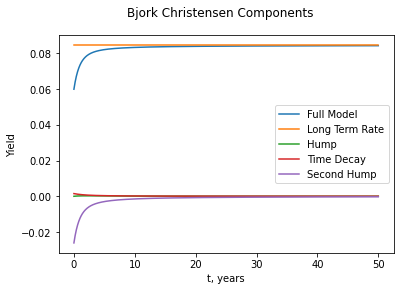

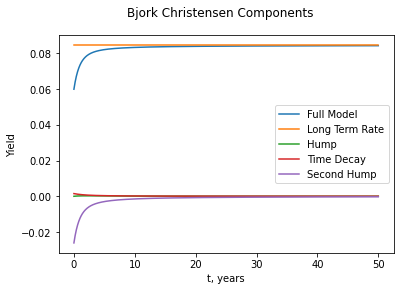

In [76]:
bjc.plot_model()

# bjork-christensen-augmented

    Attributes  	Type        	Description
      beta0	    Private	Model Coefficient Beta0
      beta1	    Private	Model Coefficient Beta1
      beta2	    Private	Model Coefficient Beta2
      beta3	    Private	Model Coefficient Beta3
      beta4	    Private	Model Coefficient Beta4
      tau	      Private	Model Coefficient tau
      attr_list	Private	Coefficient list

Creación de un modelo y calibración

In [79]:
from PyCurve.bjork_christensen_augmented import BjorkChristensenAugmented
bjc_a = BjorkChristensenAugmented(0.3,0.4,12,12,12,1)
bjc_a.calibrate(curve)

Bjork & Christensen Augmented Model
beta0 = 0.08720533918590018
beta1 = -0.0002324160659917773
beta2 = 0.019499429962778276
beta3 = -0.01730512288823411
beta4 = -0.047076602867737335
tau = 1.1582778510957126
____________________________
Calibration Results
b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Mean Squared Error 8.816803837575524e-06
Number of Iterations 18
____________________________


      fun: 8.816803837575524e-06
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.17870313e-05, -2.55471242e-05,  2.10003415e-05,  2.81511705e-05,
        1.49463751e-04,  9.60531618e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 168
      nit: 18
   status: 0
  success: True
        x: array([ 8.72053392e-02, -2.32416066e-04,  1.94994300e-02, -1.73051229e-02,
       -4.70766029e-02,  1.15827785e+00])

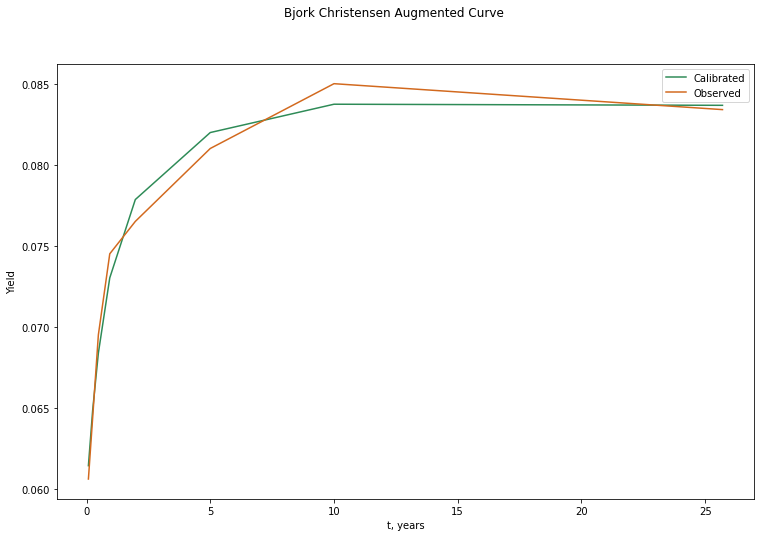

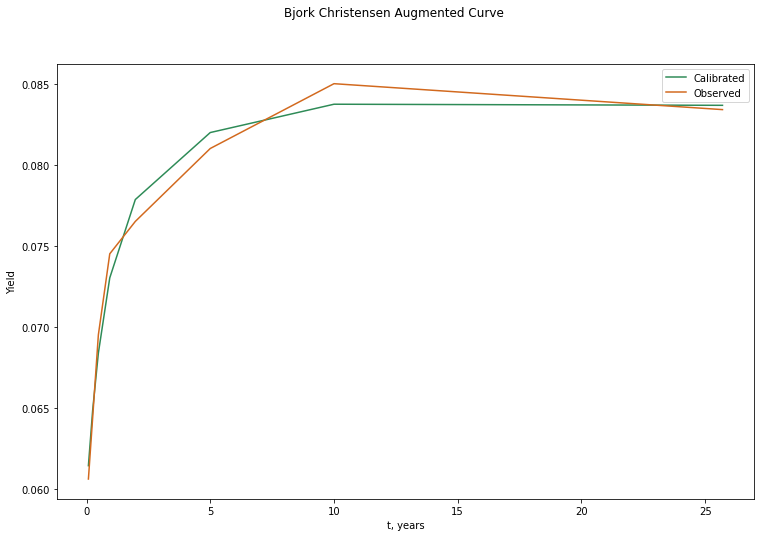

In [80]:
bjc_a.plot_calibrated(curve)

# Stochastic

Usando para simulación por Vasicek

$$ dr_t=\alpha(\beta-r_t)dt+\sigma dW_t,\quad t \in [0,T],\quad r_0>0$$
Donde: \\
$\alpha:$ Termino promedio de la media a largo plazo \\
$\beta:$ Velocidad de reversión, representa el alor en que las trayectorias se reagrupan alrededor de $\beta$ en el tiempo  \\
$\sigma:$ Volatilidad instantánea, mide al instante la amplitud de la aleatoriedad del sistema.\\
$W_t:$ Proceso de Wiener

Vasicek

    Attributes	Type	         Description
      alpha     Private	Model Coefficient alpha (mean reverting speed)
      beta	  Private	Model Coefficient Beta (long term mean)
      sigma	 Private	Short rate Volatility
      rt	    Private	Initial Short Rate
      time	  Params 	Time in years
      dt	    Private	time for each period
      steps	 Private	calculated with dt & time as time/dt

##Simulation Object

Este objeto consiste en un encapsulado de simulación simple. Este objeto es utilizado por otras clases para encapsular los resultados de la simulación de monte carlo. Este objeto tiene un método incorporado que podría realizar la conversión de una simulación a una curva de rendimiento para una curva de factor de descuento.

    Attributes	Type	              Description
       sim	  Private	    Simulated paths matrix numpy.ndarray
        dt      Private	    delta_time as float or int in a numpy.ndarray

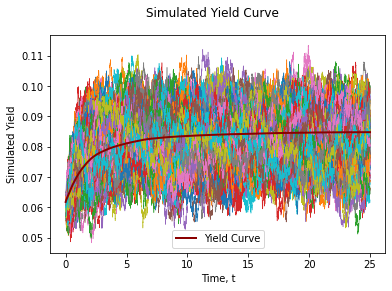

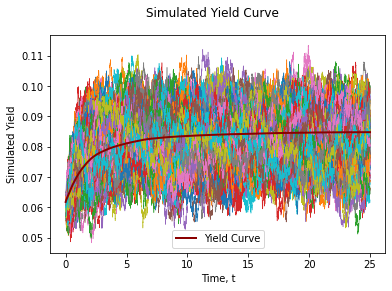

In [125]:
from PyCurve.vasicek import Vasicek
vasicek_model = Vasicek(1, 0.082, 0.011, 0.06, 25, 1 / 365)
simulation = vasicek_model.simulate_paths(200) #Return a Simulation and then we can apply Simulation Methods
simulation.plot_yield_curve()

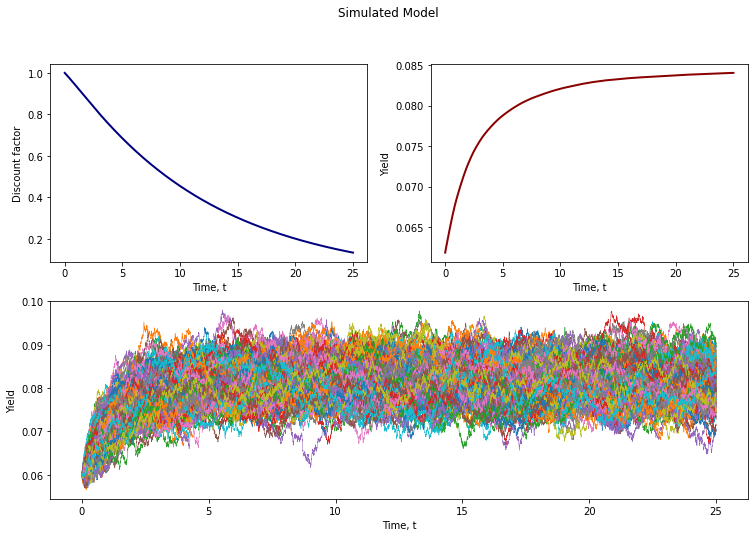

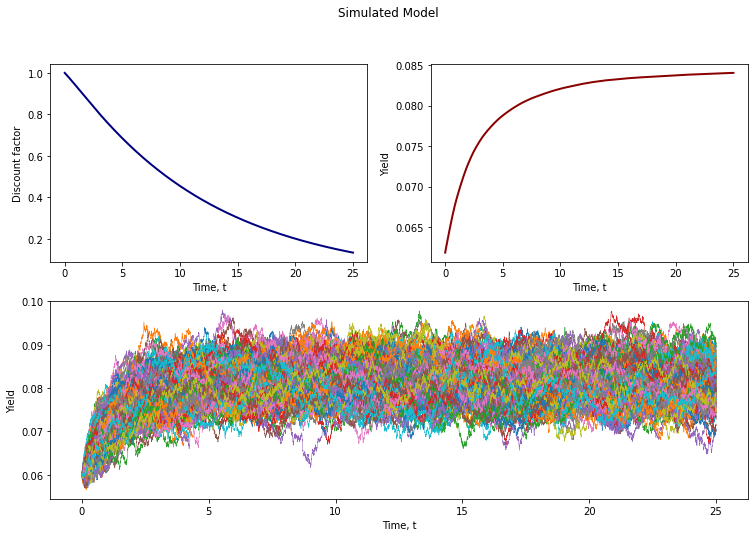

In [118]:
simulation.plot_model()

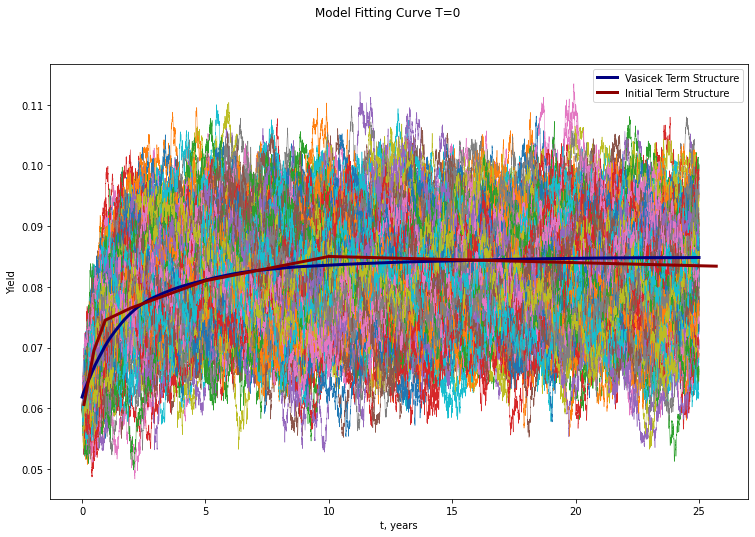

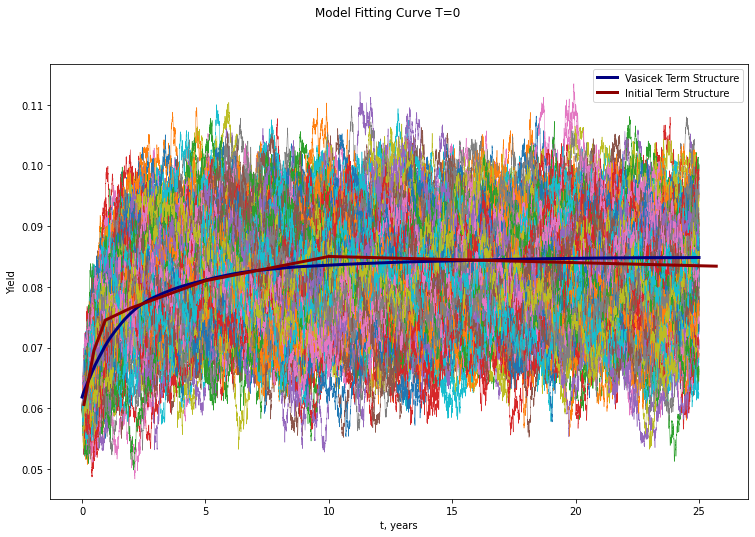

In [126]:
vasicek_model.plot_calibrated(simulation,curve)